### Importing Required Libraries and Modules

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.simplefilter('ignore')

### Loading the dataset

In [2]:
data= pd.read_csv('SampleSuperstore.csv')
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.857901,3.789574,0.156203,28.656599
std,32063.693350,623.245124,2.225110,0.206452,234.260115
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Data Pre-Processing 

In [5]:
data.iloc[:,2].value_counts()

Country
United States    9994
Name: count, dtype: int64

In [6]:
data.drop(columns={"Country"},inplace=True)

In [7]:
data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
data["Status"]=np.where(data["Profit"]>0,"Profit",np.where(data["Profit"]<0,"Loss","B\E"))

In [9]:
data.head(5)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Status
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,Profit
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,Profit
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,Profit
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,Loss
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,Profit


### Data Visualisation

#### Univariate analysis

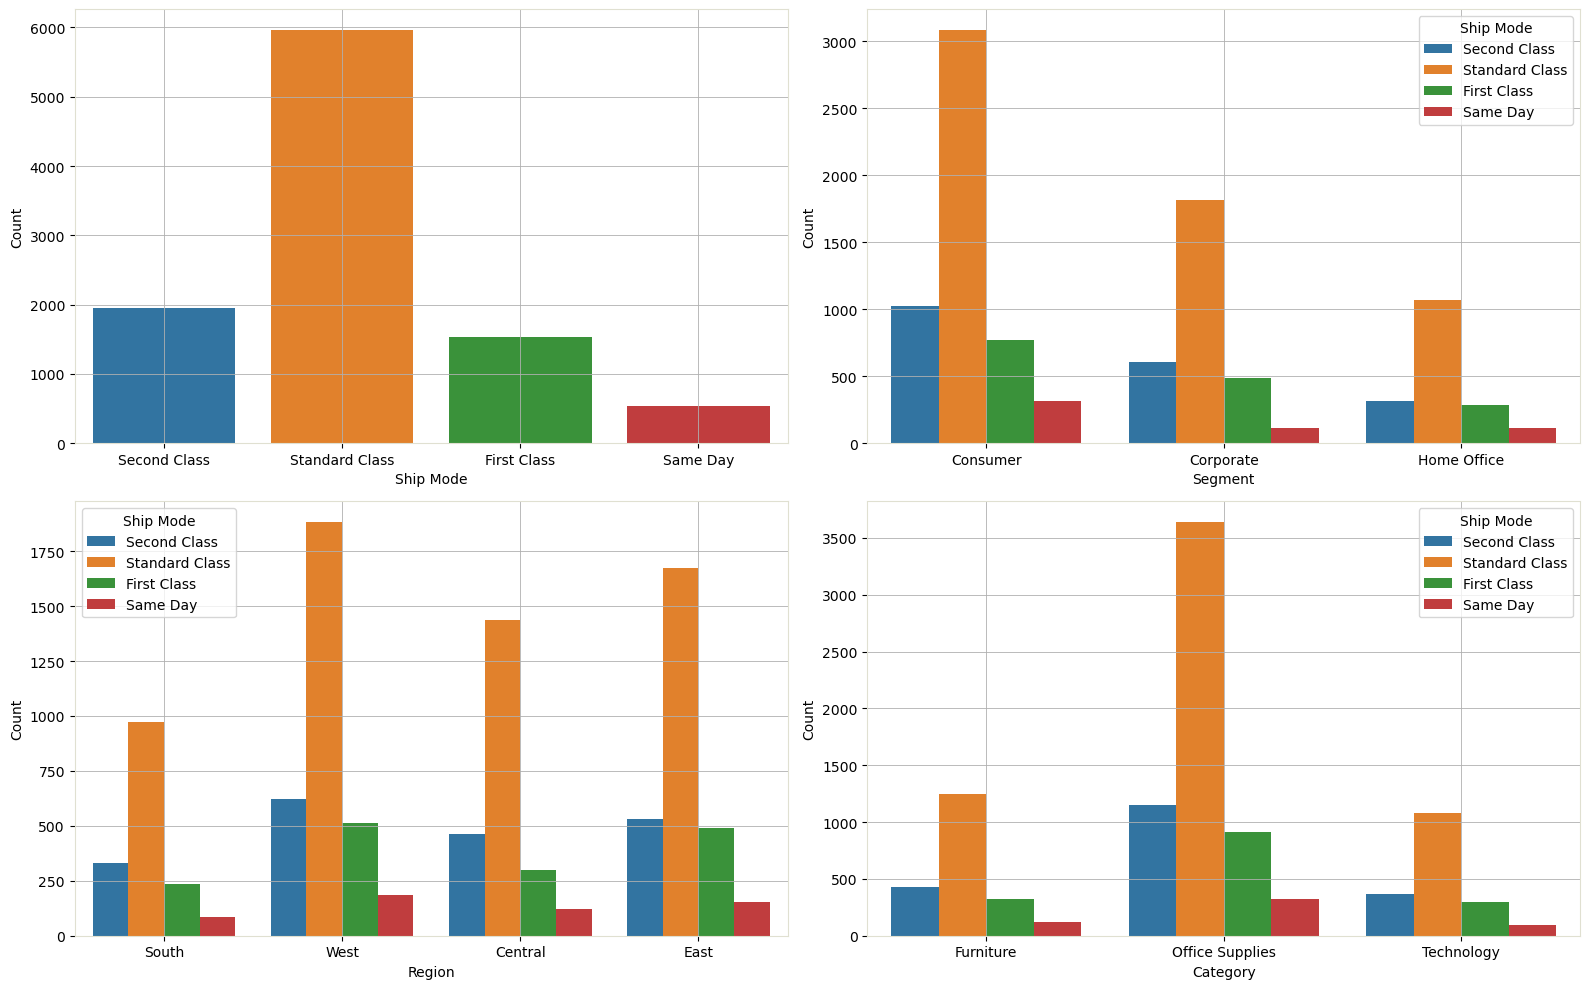

In [10]:
plt.figure(figsize=(16, 10))
plt.rcParams["axes.edgecolor"] = "#e0e0d1"

attributes = ["Ship Mode", "Segment", "Region", "Category"]

for i, attribute in enumerate(attributes, 1):
    plt.subplot(2, 2, i)
    if attribute == "Ship Mode":
        sns.countplot(data=data, x=attribute)
        plt.xlabel(attribute)
    else:
        sns.countplot(data=data, x=attribute, hue="Ship Mode")
        plt.xlabel(attribute)
    plt.ylabel("Count")
    plt.grid(linewidth=0.6)

plt.tight_layout()
plt.show()

### Comments

#### 1.Standard class shipping mode was the most preffered shipping method



#### 2.The highest quantity of goods sold were in the consumer segment followed by the corporate segment while goodsin the home office segment had the least sales




#### 3.The West region sold the highest volume of goods while the South region recorded the lowest volume in sales Goods in the Office Supplies category recorded the highest number of sales. 

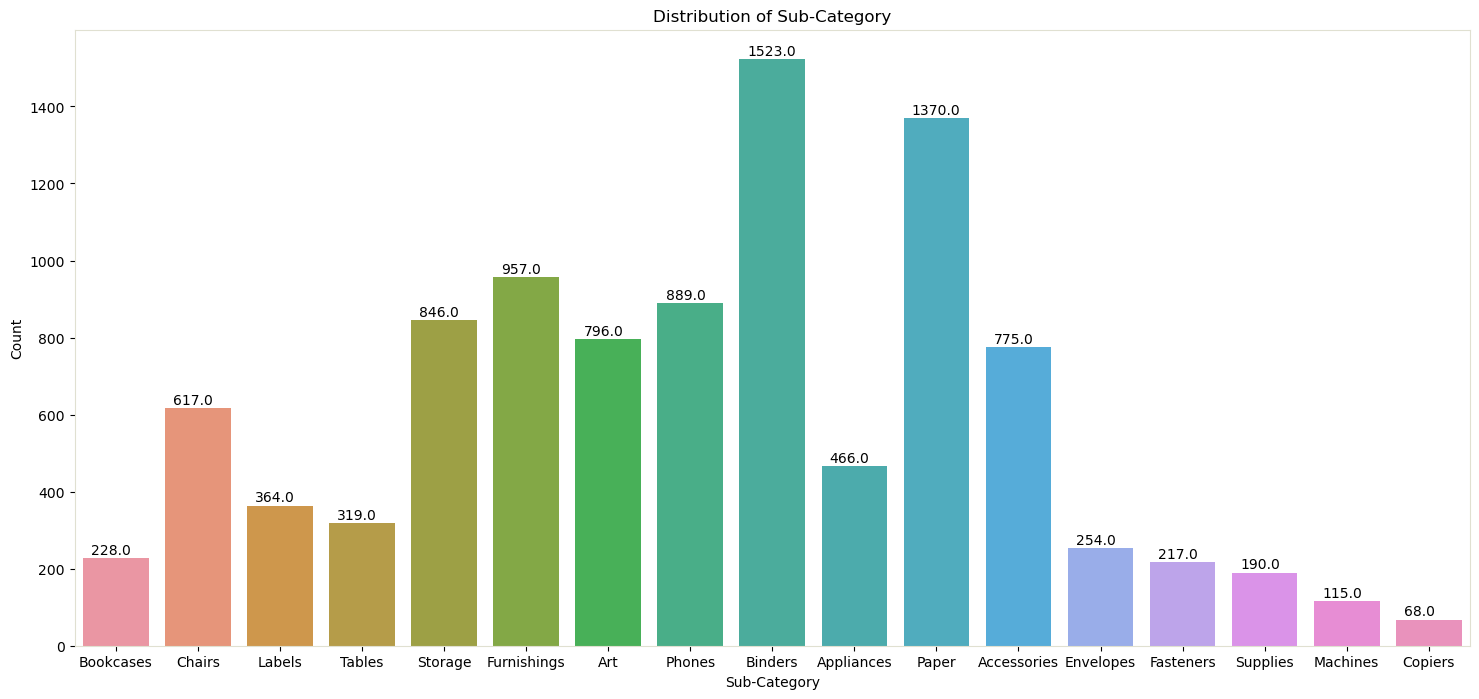

In [11]:
#Creating a barplot to visualize the total count of each sub-category
fig, ax = plt.subplots(figsize = (18, 8))
ax= sns.countplot(x = data['Sub-Category'], data=data)

#To show the total count on each bar
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+10))
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.title("Distribution of Sub-Category")
plt.show()

#### Items in the binders sub-category had the highest sales followed by goods in the paper, furnishings, phones and storage sub-categories respectively

#### Goods in the bookcases, fasteners, supplies , machines and copiers sub-category had the lowest sales

In [12]:
data.City.value_counts()

City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64

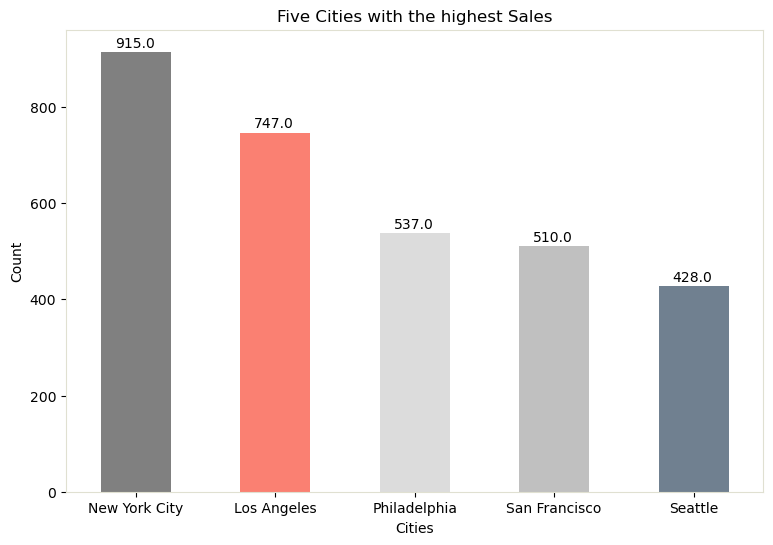

In [13]:
#Five cities with the highest sales

Colours=['grey','salmon','gainsboro', 'silver', 'slategrey']
ax=data['City'].value_counts().head(5).plot.bar(rot=0, figsize=(9,6),color=Colours)
ax.ticklabel_format(axis='y', style='plain')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1,p.get_height()+10))
plt.xlabel('Cities')
plt.ylabel('Count')
plt.title('Five Cities with the highest Sales')
plt.show()

#### The highest volume of sales were recorded in the New York City, Los Angeles, Philadelphia, San Francisco and Seattle stores

#### **Observation:**

1. The most preferred shipping method by the clients is standard class.

2. The majority of the goods sold are in the consumer segment.

3. Most purchases were made by customers from the East and West regions as opposed to the South and Central Regions.

3. Office supplies was in the lead of the categories of goods sold by the superstore

4. Binders and Paper are in the lead were thw highest sub-category of goods sold

5. New York City leads all cities in terms of the number of purchases made, followed by Los Angeles.

#### Bivariate analysis

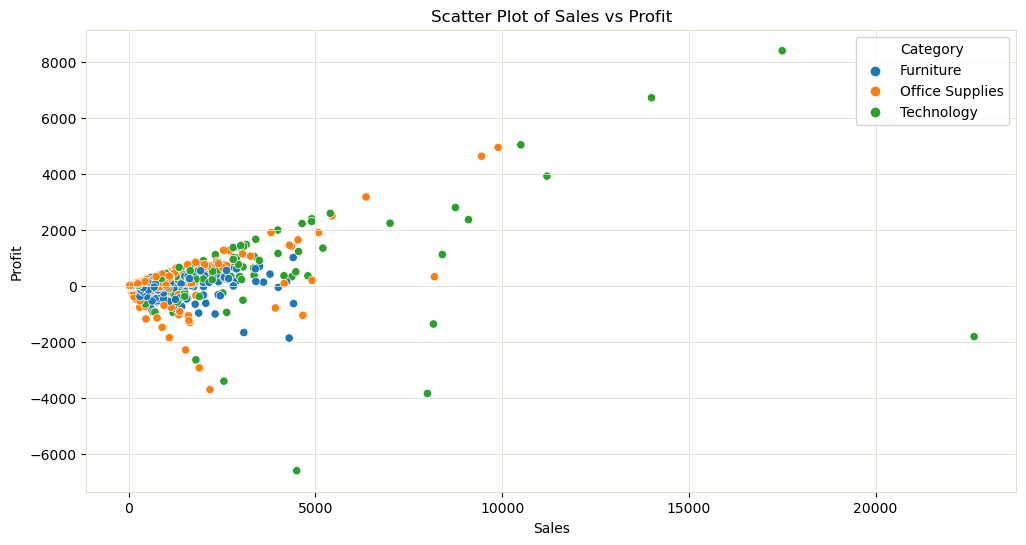

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Sales', y='Profit', hue='Category')
plt.title('Scatter Plot of Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(linewidth=0.6, color="#e0e0d1")
plt.show()

#### Profit is concentrated in office supplies and highest profits are observed in Technology category

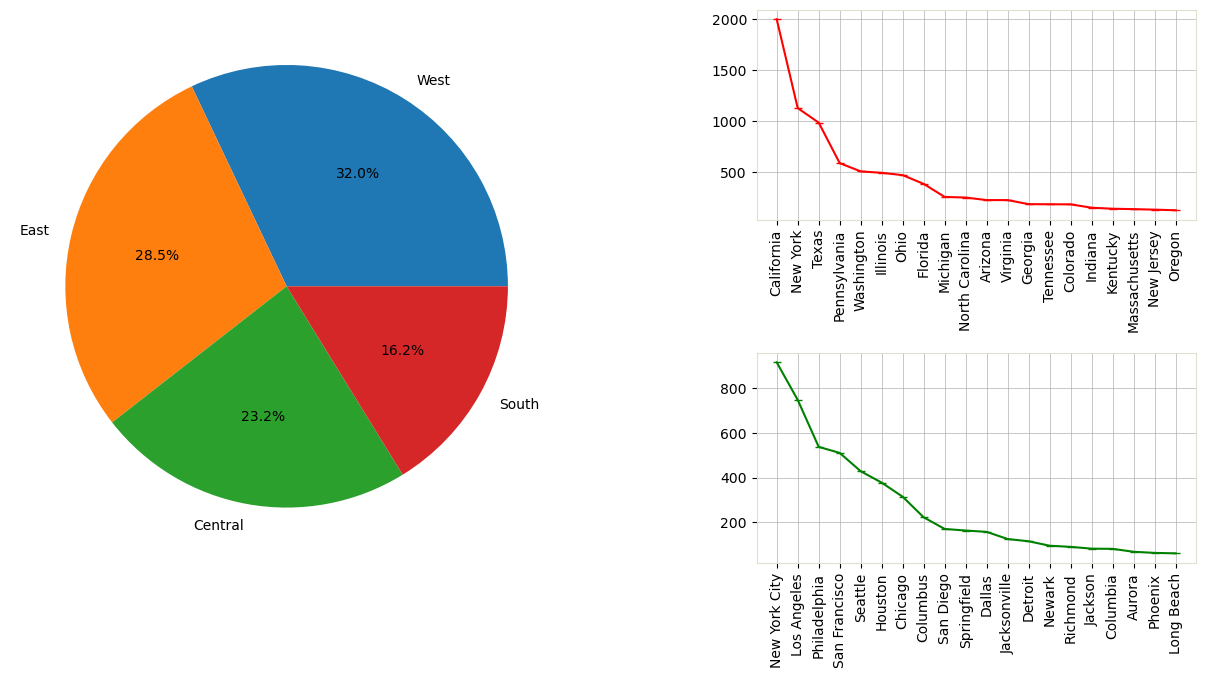

In [15]:
plt.figure(figsize=(14,7))

a1 = plt.subplot2grid((2,3),(0,0),rowspan=2, colspan=2)
sizes = list((data.Region.value_counts(normalize=True)*100).values)
label = list((data.Region.value_counts(normalize=True)*100).index)
a1.pie(sizes,labels=label,
      autopct='%1.1f%%')

a2 = plt.subplot2grid((2,3),(0,2))
a2.plot(data.State.value_counts().nlargest(20),color="r",marker="_",label=["City","Count"])
a2.grid(linewidth=0.5) 
plt.xticks(rotation=90)

a3 = plt.subplot2grid((2,3),(1,2))
a3.plot(data.City.value_counts().nlargest(20),color="g",marker="_")
a3.grid(linewidth=0.5)
plt.xticks(rotation=90)

plt.tight_layout(pad=1.5)
plt.show()

#### 1. California state contains maximum number of Super stores followed by New York and Texas  


#### 2. New York City contains maximum number of Super stores followed by LA and Philadelphia

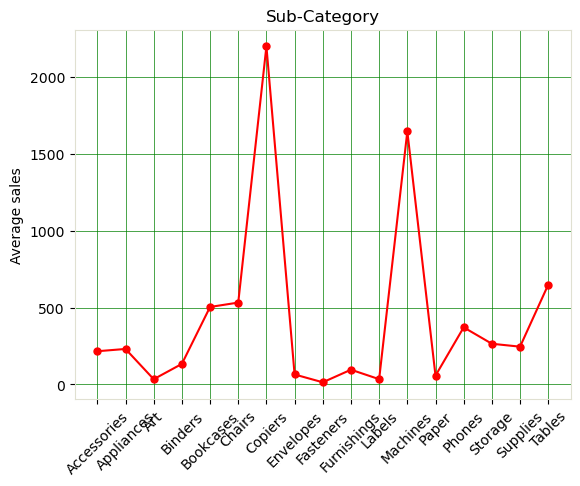

In [16]:
x2 = plt.plot(data.groupby("Sub-Category")["Sales"].mean(),marker="o",ms=5,color="r",mfc="r")
plt.xticks(rotation=45)
plt.title("Sub-Category")
plt.grid(linewidth=0.5,color="g")
plt.ylabel("Average sales")
plt.show()

#### The average sales ranges higher in copiers follwed by machines and lower in Fasteners and Art

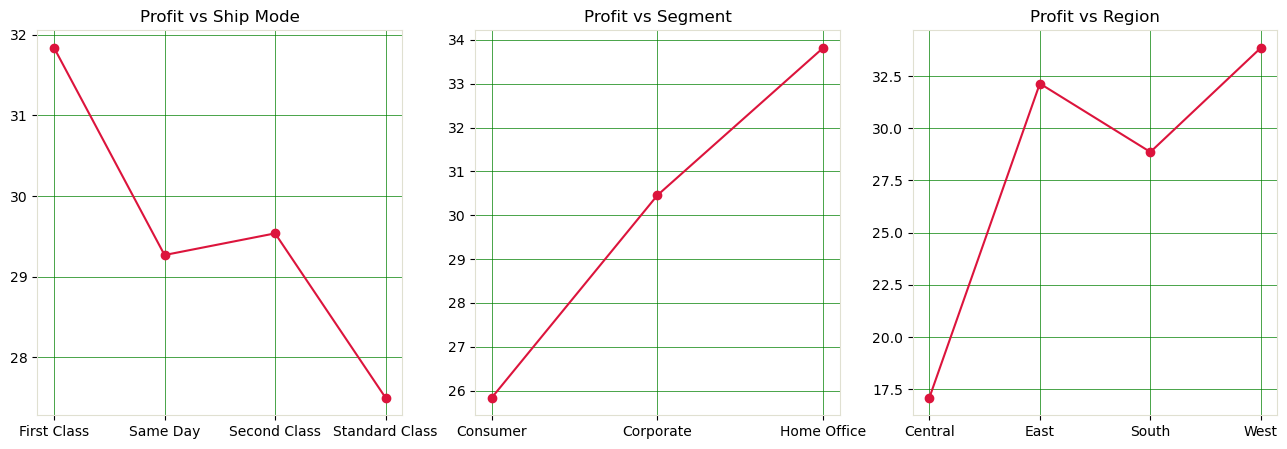

In [17]:
plt.figure(figsize=(16,5))
plt.rcParams["axes.edgecolor"] = "#e0e0d1"

attributes = ["Ship Mode","Segment","Region"]
for i in range(1,len(attributes)+1):
    plt.subplot(1,3,i)
    plt.plot(data.groupby(attributes[i-1])["Profit"].mean().index,
             data.groupby(attributes[i-1])["Profit"].mean().values,
             color="crimson",marker="o")
    plt.title(f"Profit vs {attributes[i-1]}")
    plt.grid(linewidth=0.5,color="g")

#### Distribution of Ship Mode,Segment,Region by Profit

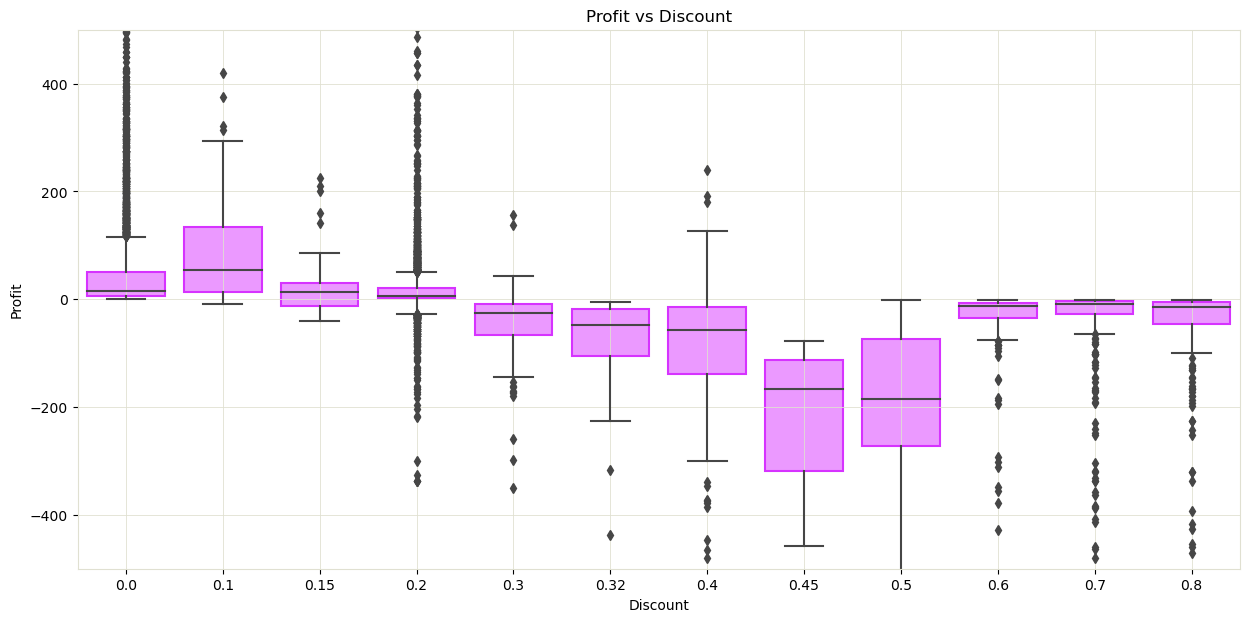

In [18]:
plt.rcParams["axes.edgecolor"] = "#e0e0d1"
plt.figure(figsize=(15, 7))

sns.boxplot(x=data["Discount"], y=data["Profit"],
        
            boxprops={'facecolor': '#eb99ff',
                      'edgecolor': '#d633ff'})

plt.title("Profit vs Discount")
plt.ylim((-500, 500))
plt.grid(linewidth=0.6, color="#e0e0d1")
plt.xlabel("Discount")
plt.ylabel("Profit")

# Show the plot
plt.show()

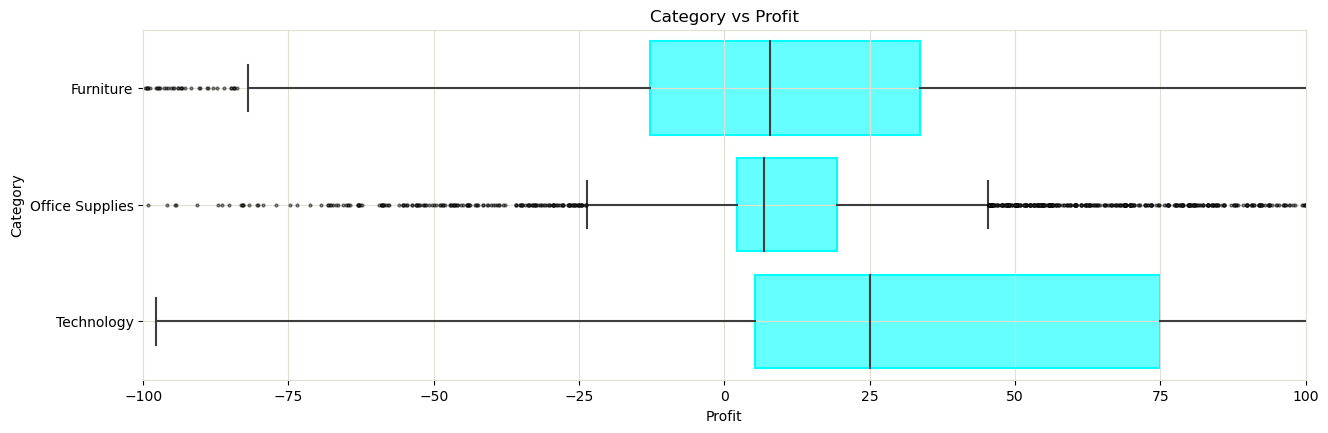

In [19]:
plt.rcParams["axes.edgecolor"] = "#e0e0d1"
plt.figure(figsize=(15, 10))
flierprops = dict(marker='o', markersize=2, markeredgecolor='black', alpha=0.5)

# Create the first boxplot for Category vs Profit
a1 = plt.subplot2grid((2, 1), (0, 0))  # Use (2, 1) to create space for a second plot
sns.boxplot(x='Profit', y='Category', data=data,
            flierprops=flierprops,
            boxprops={'facecolor': '#66ffff',
                      'edgecolor': '#00ffff'},
            ax=a1)  # Specify the axis to use
a1.set_title("Category vs Profit")
a1.set_xlim((-100, 100))
a1.grid(linewidth=0.8, color="#e0e0d1")

#### Multivariate analysis

In [20]:
profit_category = data.groupby('Category')['Profit'].sum().sort_values(ascending=False)

# Display the result
print(profit_category)

Category
Technology         145451.9773
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64


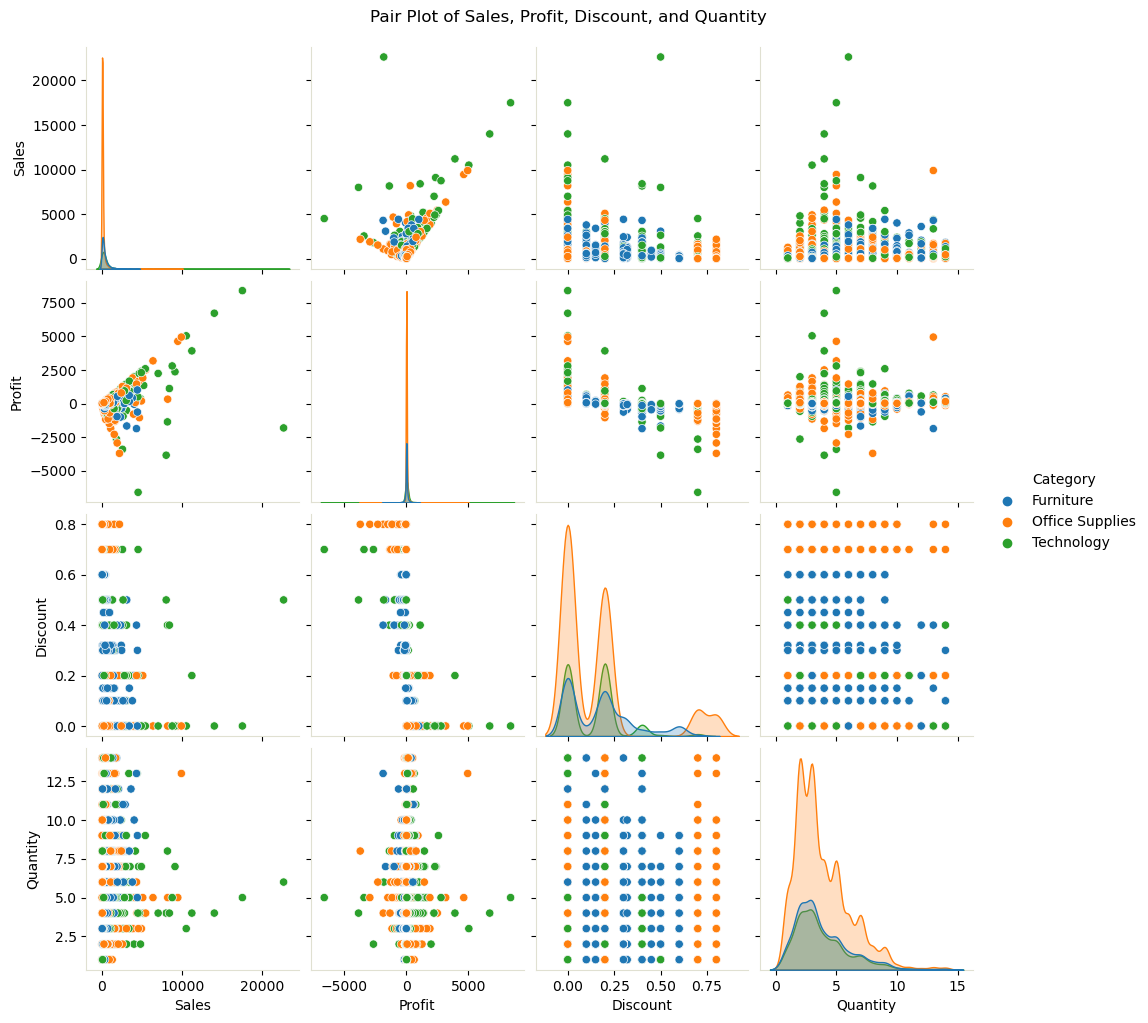

In [21]:
sns.pairplot(data, vars=['Sales', 'Profit', 'Discount', 'Quantity'], hue='Category')
plt.suptitle('Pair Plot of Sales, Profit, Discount, and Quantity', y=1.02)
plt.show()

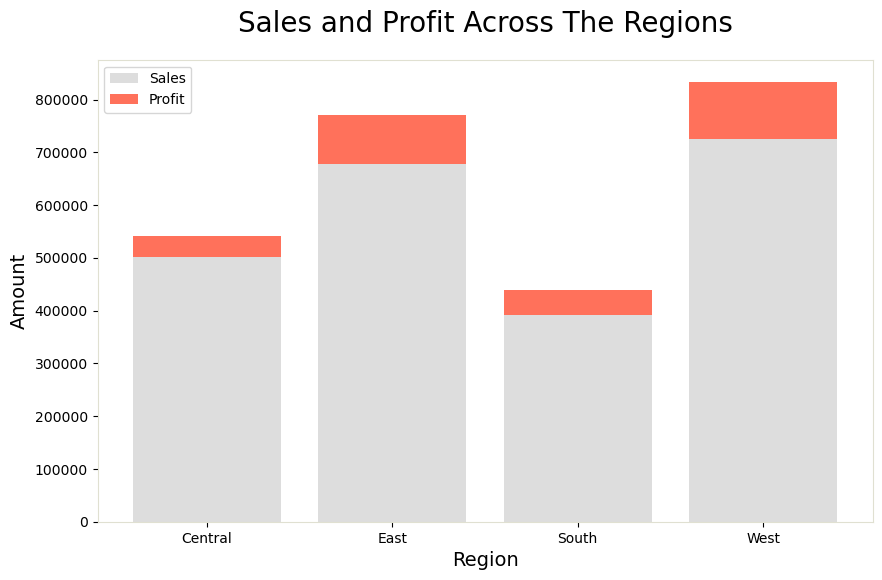

In [22]:
superstore_region = data[['Region', 'Sales', 'Profit']]

# Group by 'Region' and sum the 'Sales' and 'Profit'
superstore_region = superstore_region.groupby(['Region']).sum().reset_index()

# Plotting
plt.figure(figsize=[10, 6])
plt.bar(superstore_region['Region'], superstore_region['Sales'], color="#DDDDDD", label='Sales')
plt.bar(superstore_region['Region'], superstore_region['Profit'], bottom=superstore_region['Sales'], color="#ff715b", label='Profit')

# Adding title and labels
plt.title("Sales and Profit Across The Regions", size=20, pad=20)
plt.xlabel('Region', size=14)
plt.ylabel('Amount', size=14)
plt.legend()
plt.show()

#### The higher the sales volume across the regions, the higher the profit made though the profit generated was a fraction of the sales made

In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [24]:
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')
data['Discount'] = pd.to_numeric(data['Discount'], errors='coerce')
data['Profit'] = pd.to_numeric(data['Profit'], errors='coerce')

data['Sales'].fillna(data['Sales'].median(), inplace=True)
data['Discount'].fillna(data['Discount'].median(), inplace=True)
data['Profit'].fillna(data['Profit'].median(), inplace=True)

data["Status"] = np.where(data["Profit"] > 0, "Profit", np.where(data["Profit"] < 0, "Loss", "B/E"))


In [25]:
# Define features and target
X = data[['Segment', 'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount']]
y = data['Profit']

# List of categorical and numerical columns
categorical_cols = ['Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category']
numerical_cols = ['Postal Code', 'Sales', 'Quantity', 'Discount']

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the model
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2*100}')


Mean Squared Error: 18945.371309340382
R^2 Score: 78.24311894917709


#### An R² score of 78.24% indicates that approximately 78% of the variance in the dependent variable can be explained by the model. This suggests a relatively strong relationship between the model's predictions and the actual values.


In [26]:
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')
data['Discount'] = pd.to_numeric(data['Discount'], errors='coerce')
data['Profit'] = pd.to_numeric(data['Profit'], errors='coerce')

# Fill missing values in 'Sales', 'Discount', and 'Profit' with median
data['Sales'].fillna(data['Sales'].median(), inplace=True)
data['Discount'].fillna(data['Discount'].median(), inplace=True)
data['Profit'].fillna(data['Profit'].median(), inplace=True)

# Define features and target
data["Status"] = np.where(data["Profit"]>0,"Profit",np.where(data["Profit"]<0,"Loss","B/E"))
X = data[['Segment', 'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount']]
y = data['Status']

# List of categorical and numerical columns
categorical_cols = ['Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category']
numerical_cols = ['Postal Code', 'Sales', 'Quantity', 'Discount']

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Fit the model
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)


<Figure size 800x600 with 0 Axes>

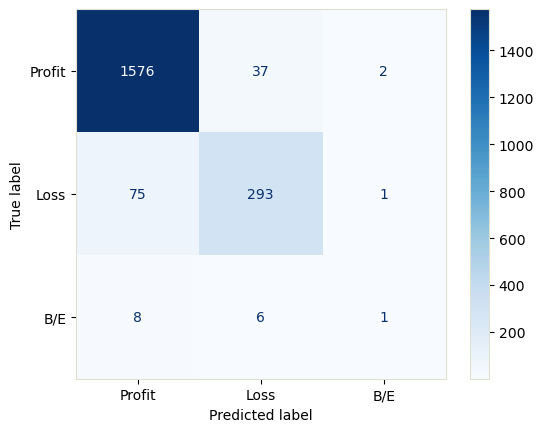

              precision    recall  f1-score   support

      Profit       0.25      0.07      0.11        15
        Loss       0.87      0.79      0.83       369
         B/E       0.95      0.98      0.96      1615

    accuracy                           0.94      1999
   macro avg       0.69      0.61      0.63      1999
weighted avg       0.93      0.94      0.93      1999



In [28]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Profit', 'Loss', 'B/E'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Profit', 'Loss', 'B/E'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=['Profit', 'Loss', 'B/E']))
